<a href="https://colab.research.google.com/github/lakshayae162/EDA/blob/main/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE - 6  EXERCISES**

## **PRINCIPAL COMPONENT ANALYSIS**

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)

In [4]:
# Selecting only numeric columns for PCA
numeric_df = data.select_dtypes(include=[np.number])
print(numeric_df)


      rownames  Anger   id
0            1     20    1
1            2     11    2
2            3     17    3
3            4     21    4
4            5     17    5
...        ...    ...  ...
7579      7580     17  312
7580      7581     20  313
7581      7582     25  314
7582      7583     23  315
7583      7584     12  316

[7584 rows x 3 columns]


In [5]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [6]:
# Performing PCA on the standardized numeric columns
pca = PCA()
pca.fit(scaled_data)

#Printing PCA results: Eigenvalues and Component Loadings
eigenvalues = pca.explained_variance_
component_loadings = pca.components_

print("Eigenvalues:")
print(eigenvalues)
print("\nComponent Loadings:")
print(component_loadings)

Eigenvalues:
[1.06681539 0.99805903 0.9355212 ]

Component Loadings:
[[ 0.45573772 -0.54791936  0.70148948]
 [ 0.77272185  0.63471398 -0.00625301]
 [-0.44181904  0.54490599  0.71265237]]


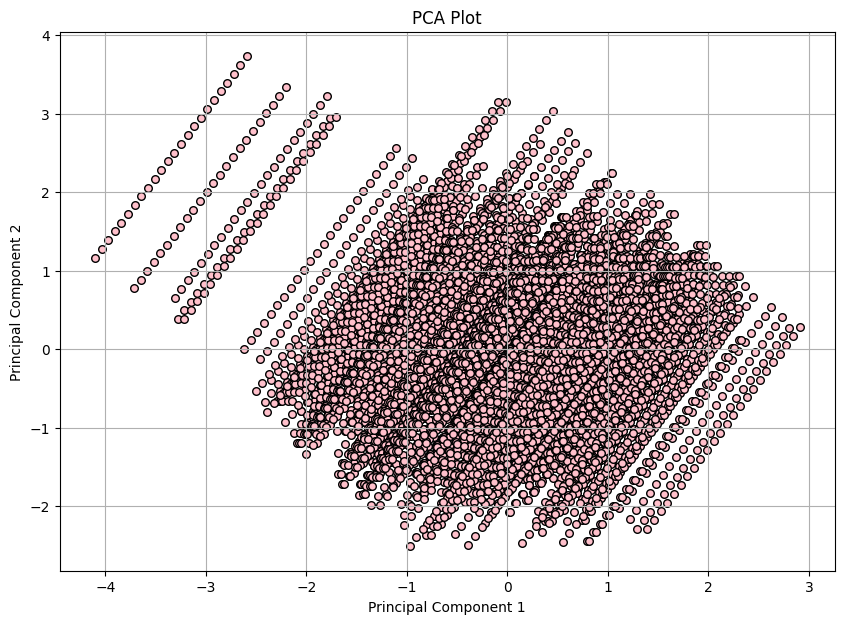

In [10]:
# Visualize PCA Components (PCA Plot and Biplot)
# Project the data onto the first two principal components
pca_data = pca.transform(scaled_data)
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='pink', edgecolor='k', s=30)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.grid(True)
plt.show()

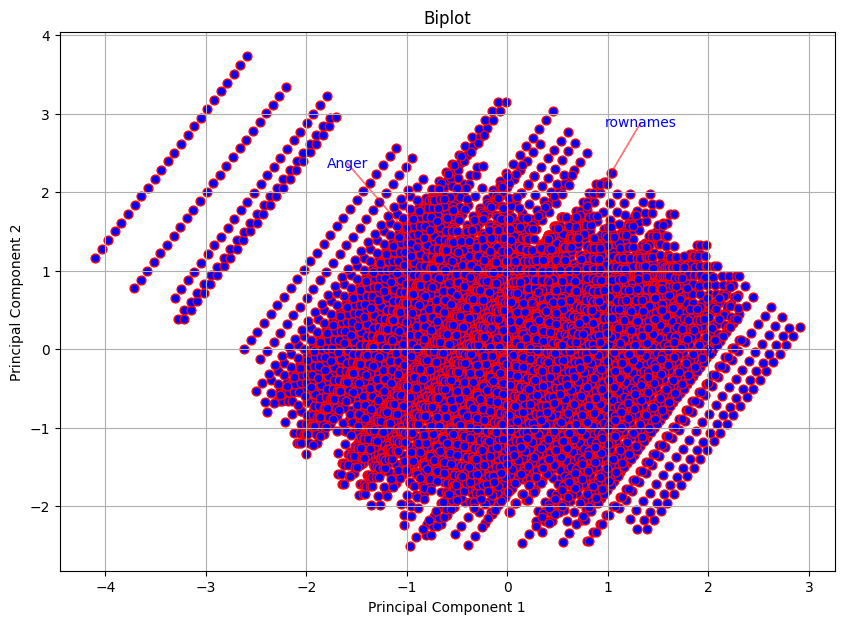

In [14]:
# Biplot for the first two components
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', edgecolor='r', s=40)
for i, (loading1, loading2) in enumerate(zip(component_loadings[0, :], component_loadings[1, :])):
    plt.arrow(0, 0, loading1 * max(pca_data[:, 0]), loading2 * max(pca_data[:, 1]), color='r', alpha=0.5)
    plt.text(loading1 * max(pca_data[:, 0]), loading2 * max(pca_data[:, 1]), numeric_df.columns[i], color='b', ha='center', va='center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot')
plt.grid(True)
plt.show()

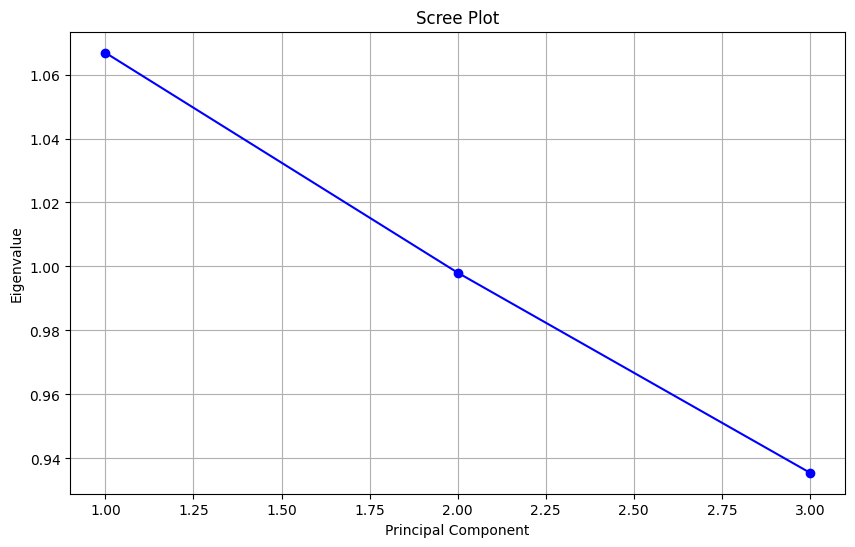

In [20]:
# Scree Plot to Determine the Optimal Number of Components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [16]:
# Selecting the desired number of components based on the Scree Plot
n_comp = 2

# Performing PCA with the selected components
pca_selected = PCA(n_components=n_comp)
pca_selected_data = pca_selected.fit_transform(scaled_data)

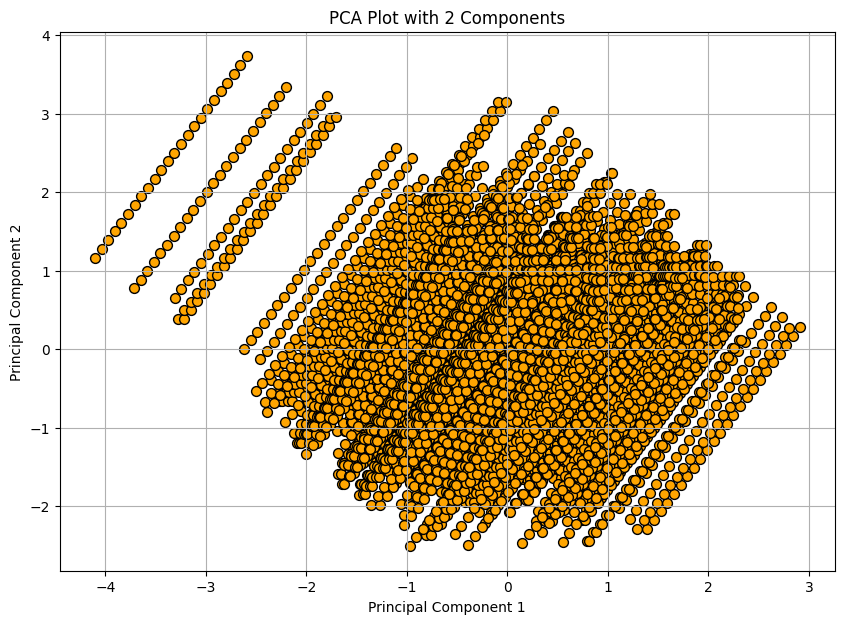

In [18]:
# Plotting the selected PCA Components
plt.figure(figsize=(10, 7))
plt.scatter(pca_selected_data[:, 0], pca_selected_data[:, 1], c='orange', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA Plot with {n_comp} Components')
plt.grid(True)
plt.show()

In [19]:
# Interpreting the Results
explained_variance = pca_selected.explained_variance_ratio_
print("Explained Variance by Selected Components:")
print(explained_variance)

cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Summary interpretation
summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(n_comp)],
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})
print("\nPCA Summary:")
print(summary_df)

Explained Variance by Selected Components:
[0.35555824 0.33264248]

Cumulative Explained Variance:
[0.35555824 0.68820072]

PCA Summary:
  Principal Component  Explained Variance  Cumulative Variance
0                 PC1            0.355558             0.355558
1                 PC2            0.332642             0.688201
